What factors made people more likely to survive?

1)Were people with higher social-economic class had a higher chance in survival rate?
2)Did children with parents have a better survival rate vs children without parents?


1	survival: Survival (0 = No; 1 = Yes)
2	pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3	name: Name
4	sex: Sex
5	age: Age
6	sibsp: Number of Siblings/Spouses Aboard
7	parch: Number of Parents/Children Aboard
8	ticket: Ticket Number
9	fare: Passenger Fare
10	cabin: Cabin
11 embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

titanic_data= pd.read_csv('titanic-data.csv')

In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data_clean= titanic_data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId'], axis=1)

In [4]:
titanic_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [5]:
titanic_clean_duplicate= titanic_data_clean.duplicated()

In [6]:
print (titanic_clean_duplicate.sum())

364


In [7]:
titanic_clean_duplicate= titanic_data_clean.duplicated('Age')
print (titanic_clean_duplicate.sum())

802


In [8]:
x= titanic_data_clean.isnull()
print (x.sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64


In [9]:
missed_age =pd.isnull(titanic_data_clean['Age'])
titanic_data_clean [missed_age].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [10]:
missing_age_female_survived= titanic_data_clean[missed_age]['Sex']=='female'

In [11]:
missing_age_female_survived.sum()

53

In [12]:
female_survived=titanic_data_clean['Sex']=='female'
male_survived=titanic_data_clean['Sex']=='male'
male_survived.sum()

577

In [13]:
print ('number of female survivors are {} and number fo male survivors are {}'.format(female_survived.sum(),male_survived.sum()))

number of female survivors are 314 and number fo male survivors are 577


In [14]:
titanic_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


In [15]:
titanic_data_clean.describe()

/Users/Farnaz/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000
50%,0.000000,3.000000,NaN,0.000000,0.000000
75%,1.000000,3.000000,NaN,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [16]:
titanic_data_clean[titanic_data_clean['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


In [17]:
young_survived1= titanic_data_clean[titanic_data_clean['Survived']==1]
young_survived1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [18]:
young_survived= young_survived1[titanic_data_clean['Age']<1]
young_survived.sum()

/Users/Farnaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Survived                                   7
Pclass                                    16
Sex         malemalefemalefemalemalemalemale
Age                                     5.17
SibSp                                      7
Parch                                      9
dtype: object

In [19]:
youngest_survived =young_survived.min()
print ('youngest child who survived was: {}'.format(youngest_survived))

youngest child who survived was: Survived         1
Pclass           1
Sex         female
Age           0.42
SibSp            0
Parch            1
dtype: object


In [20]:
oldest_survived = young_survived1[titanic_data_clean['Age']> 50]
oldest_survived.sum()

/Users/Farnaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Survived                                                   22
Pclass                                                     27
Sex         femalefemalefemalefemalefemalefemalemalefemale...
Age                                                      1264
SibSp                                                      11
Parch                                                       7
dtype: object

In [21]:
oldest_survived.max()

Survived       1
Pclass         3
Sex         male
Age           80
SibSp          2
Parch          3
dtype: object

# Were people with higher social-economic class had a higher chance in survival rate?

A summary of data in each class, such as number of survivors, total number of people in that class, sex and age of people,number of their sibilings and parents and,or spouses. 

In [22]:
class_one=titanic_data_clean[titanic_data_clean['Pclass']==1]

In [23]:
class_one.sum()

Survived                                                  136
Pclass                                                    216
Sex         femalefemalemalefemalemalemalemalefemalemalema...
Age                                                   7111.42
SibSp                                                      90
Parch                                                      77
dtype: object

In [24]:
class_two=titanic_data_clean[titanic_data_clean['Pclass']==2]
class_three=titanic_data_clean[titanic_data_clean['Pclass']==3]
class_two.sum()

Survived                                                   87
Pclass                                                    368
Sex         femalefemalemalemalemalemalefemalefemalefemale...
Age                                                   5168.83
SibSp                                                      74
Parch                                                      70
dtype: object

In [25]:
class_three.sum()

Survived                                                  119
Pclass                                                   1473
Sex         malefemalemalemalemalefemalefemalemalemalefema...
Age                                                   8924.92
SibSp                                                     302
Parch                                                     193
dtype: object

In [26]:
female_total= titanic_data_clean.groupby(['Sex']).size()['female']

print (female_total)

314


##Percentage of different gender survivors in each class compare to the total number of people of that gender.

In [27]:
def survived_group(sex, pclass):
    grouped_total = titanic_data_clean.groupby(['Pclass', 'Sex', 'Survived']).size()[pclass,sex,1].astype('float')
    grouped_gender_total= titanic_data_clean.groupby(['Sex']).size()[sex].astype('float')
    percentage= (grouped_total/grouped_gender_total*100).round(2)
    return percentage

In [28]:
groupedby_class_survived_size = titanic_data_clean.groupby(['Pclass','Sex','Survived']).size()
print (groupedby_class_survived_size)

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64


In [29]:
print ('rate of female survivors in the first class was {}% of all females aboard'.format(survived_group('female',1)))
print ('rate of female survivors in the second class was {}%of all females'.format(survived_group('female',2)))
print ('rate of female survivors in the third class was {}%of all females'.format(survived_group('female',3)))

rate of female survivors in the first class was 28.98% of all females aboard
rate of female survivors in the second class was 22.29%of all females
rate of female survivors in the third class was 22.93%of all females


In [30]:
def survived_group2(sex, pclass):
    grouped_total = titanic_data_clean.groupby(['Pclass', 'Sex', 'Survived']).size()[pclass,sex,1].astype('float')
    grouped_gender_total= titanic_data_clean.groupby(['Pclass']).size()[pclass].astype('float')
    percentage2= (grouped_total/grouped_gender_total*100).round(2)
    return percentage2

In [31]:
print ('rate of female survivors in the first class was {}%of all members of that class'.format(survived_group2('female',1)))

rate of female survivors in the first class was 42.13%of all members of that class


In [32]:
print ('rate of male survivors in the first class was {}%of all members of that class'.format(survived_group2('male',1)))

rate of male survivors in the first class was 20.83%of all members of that class


In [33]:
print ('rate of female survivors in the first class was {}%of all members of that class'.format(survived_group2('female',2)))
print ('rate of male survivors in the first class was {}%of all members of that class'.format(survived_group2('male',2)))

rate of female survivors in the first class was 38.04%of all members of that class
rate of male survivors in the first class was 9.24%of all members of that class


In [34]:
print ('rate of female survivors in the first class was {}%of all members of that class'.format(survived_group2('female',3)))
print ('rate of male survivors in the first class was {}%of all members of that class'.format(survived_group2('male',3)))

rate of female survivors in the first class was 14.66%of all members of that class
rate of male survivors in the first class was 9.57%of all members of that class


In [35]:
#all the surviversof class 1
grouped_class1= titanic_data_clean.groupby(['Pclass','Survived']).size()[1,1].astype('float')
grouped_class1.sum()

136.0

In [36]:
#all the survivers of class 2
grouped_class2= titanic_data_clean.groupby(['Pclass','Survived']).size()[2,1].astype('float')
grouped_class2.sum()

87.0

In [37]:
#all the survivers of class 3
grouped_class3= titanic_data_clean.groupby(['Pclass','Survived']).size()[3,1].astype('float')
grouped_class3.sum()

119.0

In [38]:
grouped_class3= titanic_data_clean.groupby(['Pclass','Survived']).size()[3,1].astype('float')
grouped_classx= titanic_data_clean.groupby(['Pclass']).size()[3].astype('float')
print ('of all {} people at the third class only {} people survived '.format(grouped_classx,grouped_class3))


of all 491.0 people at the third class only 119.0 people survived 


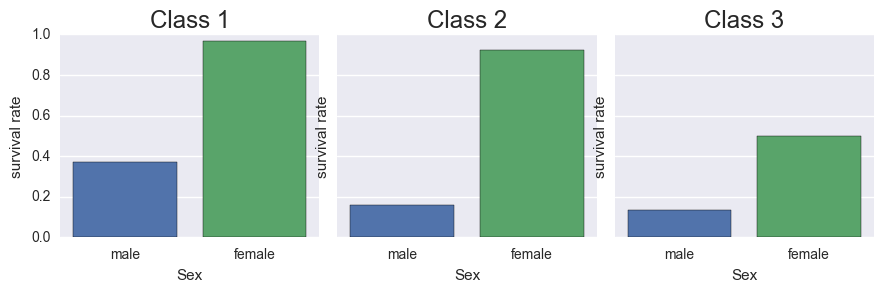

In [39]:
import matplotlib.pylab as pylab
first_plot = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_data_clean, 
                   saturation=.9, kind="bar", ci=None, size=3, aspect=1)

first_plot_revised = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(first_plot_revised)
first_plot.set(ylabel='survival rate')
first_plot.set_titles("Class {col_name}")

Although data shows that passengers of Class3 had a similar survival rate(119) as those from Class1 (136). However, looking at the percentages of the overall passengers per class and the total numbers across each class, it can be assumed that a passenger from Class1 is about 2.5x times more likely to survive than a passenger in Class3.

Therefore, people with higher social-economic class had a higher chance in survival rate:
Class 1: 62.96%
Class 2: 47.28%
Class 3: 24.24%

# Did children with parents have a better survival rate vs children without parents?

A person with the age less than 18 is define as a child.

In [40]:
titanic_data_clean.loc[
    (titanic_data_clean['Age'] < 18),
    'Category'] = 'Child'
all_kids=titanic_data_clean.loc[(titanic_data_clean['Category'] == 'Child')]
all_kids.head()
number_of_all_kids=all_kids.groupby('Category').size()
print(number_of_all_kids)
number_of_all_kids_survived= titanic_data_clean.loc[(titanic_data_clean['Category'] == 'Child')& (titanic_data_clean['Survived'] == True)]
print (number_of_all_kids_survived.sum())
number_of_allkids_survived=number_of_all_kids_survived.groupby('Category').size()

Category
Child    113
dtype: int64
Survived                                                   61
Pclass                                                    140
Sex         femalefemalefemalefemalefemalefemalefemalemale...
Age                                                    481.17
SibSp                                                      47
Parch                                                      63
Category    ChildChildChildChildChildChildChildChildChildC...
dtype: object


In [41]:
children_with_parents=titanic_data_clean.loc[(titanic_data_clean['Category'] == 'Child') & (titanic_data_clean['Parch'] > 0)]
children_with_parents.head()
children_with_parents.sum()
children_with_parents_number=len(children_with_parents)
print (children_with_parents_number)

81


In [42]:
children_without_parents=titanic_data_clean.loc[(titanic_data_clean['Category'] == 'Child') & (titanic_data_clean['Parch'] == 0)]
children_without_parents.head()
children_without_parents_number=len(children_without_parents)
print (children_without_parents_number)

32


In [43]:
children_with_parents_Survived_sum=children_with_parents.Survived.sum()
print(children_with_parents_Survived_sum)
children_with_parents_notSurvived= children_with_parents_number-children_with_parents_Survived_sum

45


In [44]:
children_without_parents_Survived_sum=children_without_parents.Survived.sum()
print (children_without_parents_Survived_sum)
children_without_parents_notSurvived= children_without_parents_number-children_without_parents_Survived_sum

16


In [45]:
#percentage of chilrden survived with parents and chilrden survived without parents in relation to all the children on the Titanic
Rate_children_with_parents= ((children_with_parents_Survived_sum)/(children_with_parents_number))*100
Rate_children_with_parents1=round(Rate_children_with_parents,2)
print('Rate of survival for children with parents is {}% '.format(Rate_children_with_parents1))

Rate_children_without_parents= ((children_without_parents_Survived_sum)/(children_without_parents_number))*100
Rate_children_without_parents1=round(Rate_children_without_parents,2)
print('Rate of survival for children without parents is {}% '.format(Rate_children_without_parents1))

Rate of survival for children with parents is 55.56% 
Rate of survival for children without parents is 50.0% 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1179eac18>], dtype=object)

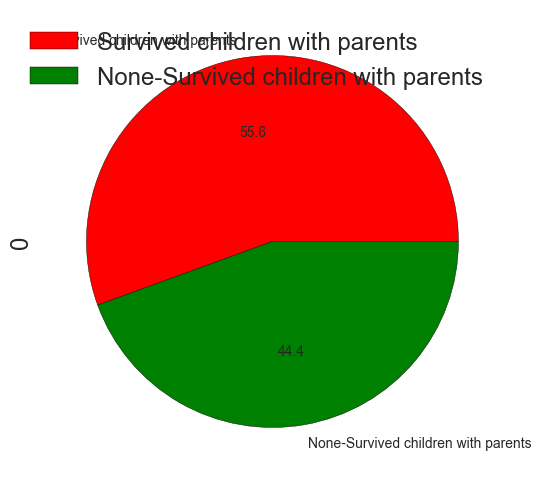

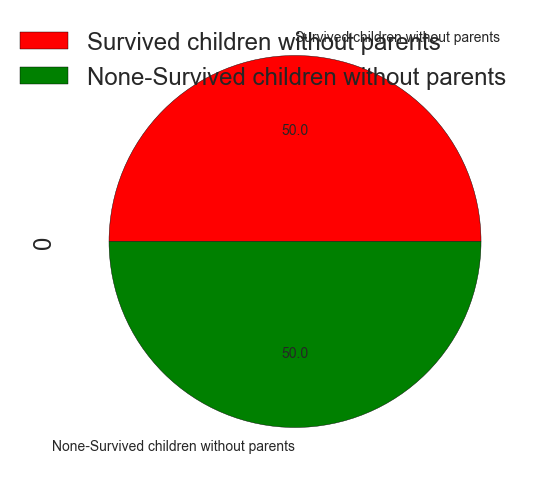

In [46]:
series1=pd.DataFrame([children_with_parents_Survived_sum,children_with_parents_notSurvived],index=['a', 'b'])
series1.plot.pie(labels=['Survived children with parents', 'None-Survived children with parents'], colors=['r', 'g'],autopct='%.1f', fontsize=10, figsize=(6, 6),subplots=True)

series2=pd.DataFrame([children_without_parents_Survived_sum,children_without_parents_notSurvived],index=['a', 'b'])
series2.plot.pie(labels=['Survived children without parents', 'None-Survived children without parents'], colors=['r', 'g'],autopct='%.1f', fontsize=10, figsize=(6, 6),subplots=True)


Data shows that number of children who could survive with parents is almost 2 times as children without parents. However, rate of children with parents who could survive out of all children with parents is almost equal to rate of children without parents who could survive out of all children without parents. Hence it was as possible to survive with parents as without parents.

# Conclusion:
The data that we worked with in this project is a limited data-base with many information which are missed. for example with children with and without parents, it is hard to judge the older sibiling roles or even roles of nanies. 

Issues:
The category of 'children' was assumed to be anyone under the age of 18, however adulthood was certainly not been defined the same in the 1900s. meaning that it is very possible that children bellow but close to age of 18 were traveling with their spouses. 

in this data-set my investigation distinguish between Correlation and Causation. there might be correlations between two data sets however it is not correct to draw conclusions and misstake it with causation.

Resources:

https://docs.python.org/3/tutorial/

https://docs.python.org/2/tutorial/

Google.com

http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

